In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [ ]:
dataset = '/content/keypoint.csv'
model_save_path = '/content/keypoint_classifier.hdf5'
tflite_save_path = '/content/keypoint_classifier.tflite'

# Set number of classes

In [ ]:
NUM_CLASSES = 5

# Dataset reading

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
18/22 [=======================>......] - ETA: 0s - loss: 2.1899 - accuracy: 0.1311  
Epoch 1: saving model to /content/keypoint_classifier.hdf5
22/22 [==============================] - 3s 14ms/step - loss: 2.1763 - accuracy: 0.1392 - val_loss: 2.0178 - val_accuracy: 0.2238
Epoch 2/1000
18/22 [=======================>......] - ETA: 0s - loss: 2.0073 - accuracy: 0.2127
Epoch 2: saving model to /content/keypoint_classifier.hdf5
22/22 [==============================] - 0s 6ms/step - loss: 1.9939 - accuracy: 0.2247 - val_loss: 1.8989 - val_accuracy: 0.2573
Epoch 3/1000
 1/22 [>.............................] - ETA: 0s - loss: 1.8916 - accuracy: 0.2031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/22 [======================>.......] - ETA: 0s - loss: 1.8906 - accuracy: 0.2583
Epoch 3: saving model to /content/keypoint_classifier.hdf5
22/22 [==============================] - 0s 6ms/step - loss: 1.8804 - accuracy: 0.2604 - val_loss: 1.7933 - val_accuracy: 0.2768
Epoch 4/1000
18/22 [=======================>......] - ETA: 0s - loss: 1.7977 - accuracy: 0.2899
Epoch 4: saving model to /content/keypoint_classifier.hdf5
22/22 [==============================] - 0s 6ms/step - loss: 1.7851 - accuracy: 0.2943 - val_loss: 1.7243 - val_accuracy: 0.2822
Epoch 5/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.7369 - accuracy: 0.2850
Epoch 5: saving model to /content/keypoint_classifier.hdf5
22/22 [==============================] - 0s 6ms/step - loss: 1.7371 - accuracy: 0.2863 - val_loss: 1.6814 - val_accuracy: 0.2811
Epoch 6/1000
19/22 [========================>.....] - ETA: 0s - loss: 1.6799 - accuracy: 0.3006
Epoch 6: saving model to /content/keypoint_classifier.hdf5
22/22 

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 3ms/step - loss: 0.7986 - accuracy: 0.6951


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 100ms/step
[6.0872864e-03 4.8397653e-02 6.6693890e-01 1.7431474e-01 1.0422410e-01
 3.6750789e-06 5.2351347e-06 2.8464872e-05]
2


# Confusion matrix

29/29 [==============================] - 0s 1ms/step


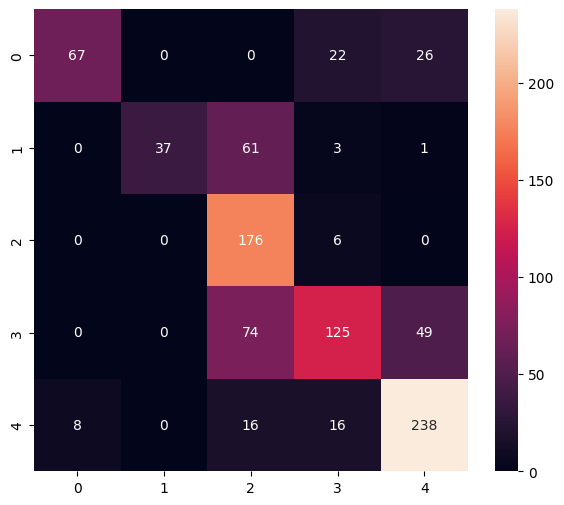

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.58      0.71       115
           1       1.00      0.36      0.53       102
           2       0.54      0.97      0.69       182
           3       0.73      0.50      0.60       248
           4       0.76      0.86      0.80       278

    accuracy                           0.70       925
   macro avg       0.78      0.65      0.67       925
weighted avg       0.75      0.70      0.68       925



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6720

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 307 µs, sys: 26 µs, total: 333 µs
Wall time: 245 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.0872850e-03 4.8397642e-02 6.6693884e-01 1.7431475e-01 1.0422408e-01
 3.6750787e-06 5.2351288e-06 2.8464845e-05]
2
